# Cleaning the Twitter Data

In [90]:
# Import necessary libraries

import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [2]:
# Read in and preview 'tesla_tweets.csv'

tweets = pd.read_csv('tesla_tweets.csv', engine='python')
tweets.head()

,id,tweet,date_time
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14


In [3]:
# Examine datatypes inside tweets

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213213 entries, 0 to 213212
Data columns (total 3 columns):
id           213213 non-null object
tweet        213213 non-null object
date_time    213153 non-null object
dtypes: object(3)
memory usage: 4.9+ MB


In [4]:
# Convert date_time column into datetime stamp

tweets.date_time = pd.to_datetime(tweets.date_time)

In [5]:
# Check for duplicates

tweets[tweets.duplicated()]

,id,tweet,date_time


In [154]:
tweets.shape

(213213, 4)

## Clean & Tokenize Tweets

In [7]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens


In [9]:
clean_tweets(tweets)
tweets.head()

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,id,tweet,date_time,clean_tweet
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19,"[tesla, tsla, rating, increased, hold, valueng..."
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15,"[tesla, tsla, rating, increased, hold, valueng..."
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37,"[horseman, capital, management, ltd, increases..."
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37,"[tesla, inc, tsla, holding, lifted, horseman, ..."
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14,"[insider, selling, tesla, inc, nasdaq, tsla, v..."


## Lemmatize

In [10]:
tweets.clean_tweet[4]

['insider',
 'selling',
 'tesla',
 'inc',
 'nasdaq',
 'tsla',
 'vp',
 'sells',
 'shares',
 'stock']

In [30]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [31]:
lemmatize_tweet(tweets.clean_tweet)
tweets

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,tweet,date_time,clean_tweet
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19,tesla tsla rating increase hold valuengine
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15,tesla tsla rating increase hold valuengine
2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37,horseman capital management ltd increase posit...
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37,tesla inc tsla hold lifted horseman capital ma...
4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14,insider sell tesla inc nasdaq tsla vp sell sha...
5,947754466987663360,(Maturing Bonds About To Drain Billions Of Dol...,2018-01-01 04:00:48,mature bond drain billion dollar tesla
6,947755343135825921,$NTES Tesla (Call) (TSLA) Stock Price Rose Whi...,2018-01-01 04:04:16,ntes tesla call tsla stock price rise hsbc hol...
7,947767451227443200,Is Tesla the Big Short for 2018?? https://see...,2018-01-01 04:52:23,tesla big short
8,947770942507356160,Maturing Bonds About To Drain Billions Of Doll...,2018-01-01 05:06:16,mature bond drain billion dollar tesla tsla
9,947776152495640577,TSLA Stock: Tesla’s Elon Musk Promises a Picku...,2018-01-01 05:26:58,tsla stock tesla elon musk promise pickup truck


In [32]:
tweets.clean_tweet[4]

'insider sell tesla inc nasdaq tsla vp sell share stock'

## EDA

### What are the most common words?

In [36]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

In [217]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

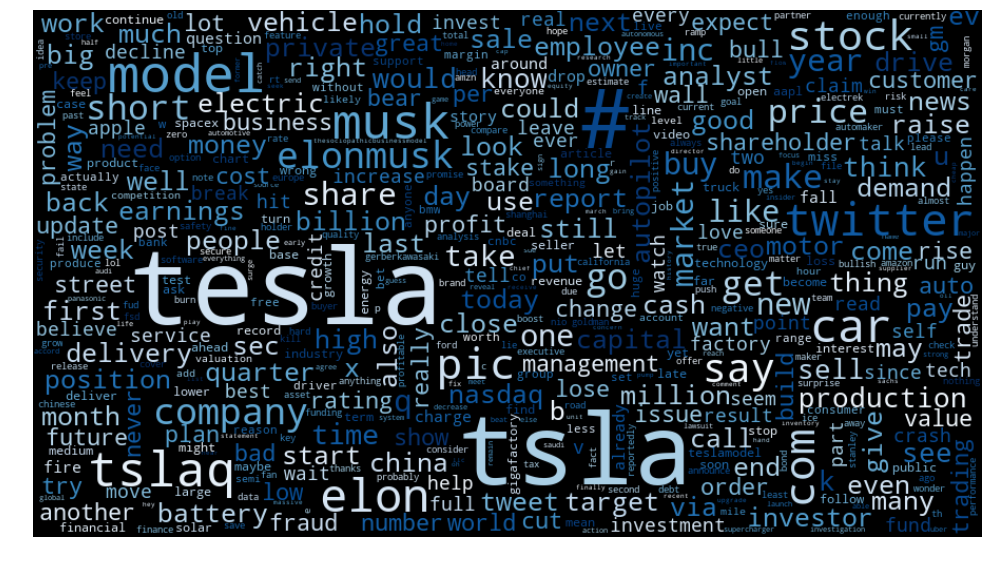

In [42]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [172]:
# Remove 'tesla, 'tsla', 'q', and '#'

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tesla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tsla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('q',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('#',''))


In [173]:
finish_cleaning(tweets)

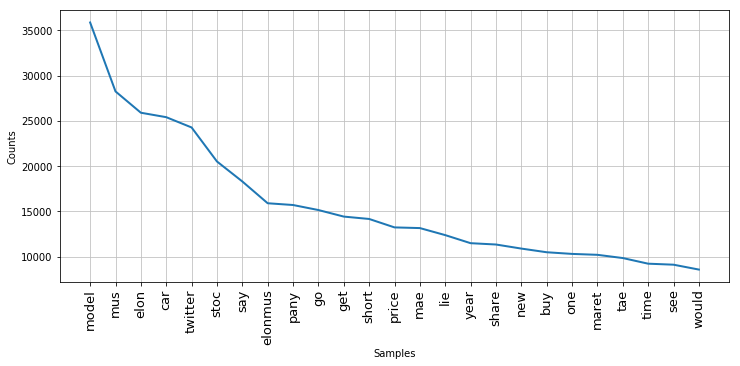

In [174]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

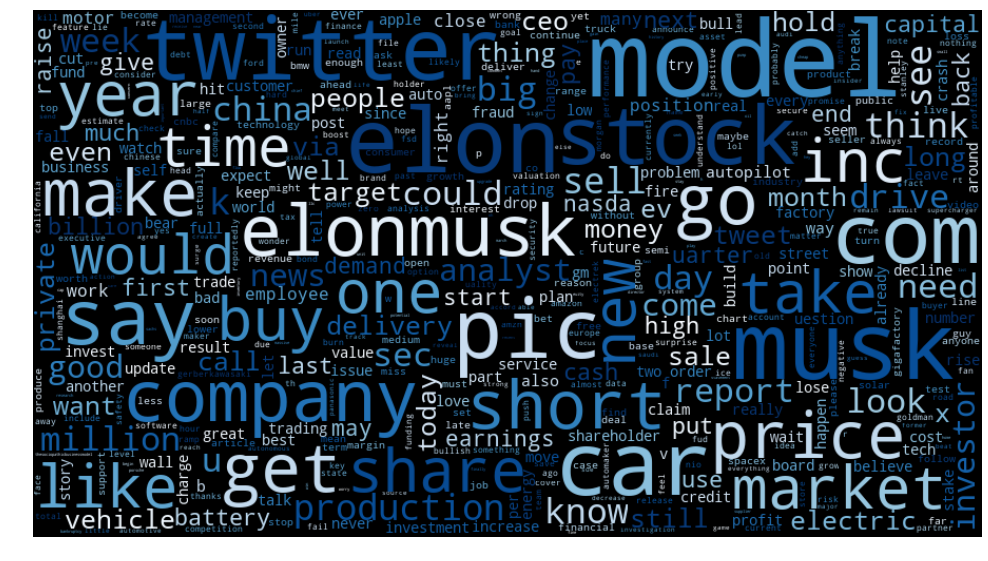

In [63]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
70,model,35860
33,musk,28237
32,elon,25895
127,car,25404
170,twitter,24268
171,com,22211
169,pic,21906
16,stock,20511
318,say,18306
43,elonmusk,15895


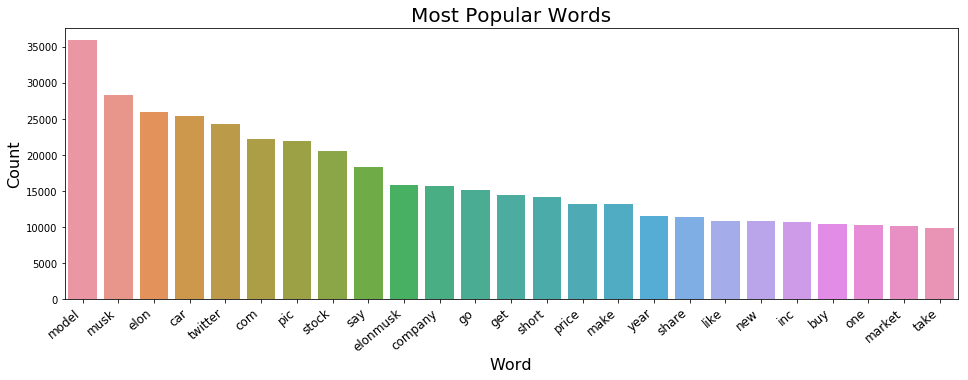

In [168]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

### What time of day are there the most Tesla tweets?

In [130]:
# Create a dataframe grouping the number of tweets by hour of the day

hour_df = pd.DataFrame(tweets.groupby(tweets['date_time'].dt.hour)['clean_tweet'].count()).reset_index()
hour_df = hour_df.rename(columns={'date_time': 'Hour', 'clean_tweet': 'Count'})
hour_df.Hour = hour_df.Hour.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0], ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM', '12:00 AM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'])
hour_df

,Hour,Count
0,12:00 AM,4167
1,1:00 AM,3743
2,2:00 AM,3531
3,3:00 AM,5439
4,4:00 AM,3174
5,5:00 AM,4167
6,6:00 AM,5639
7,7:00 AM,7418
8,8:00 AM,10669
9,9:00 AM,16046


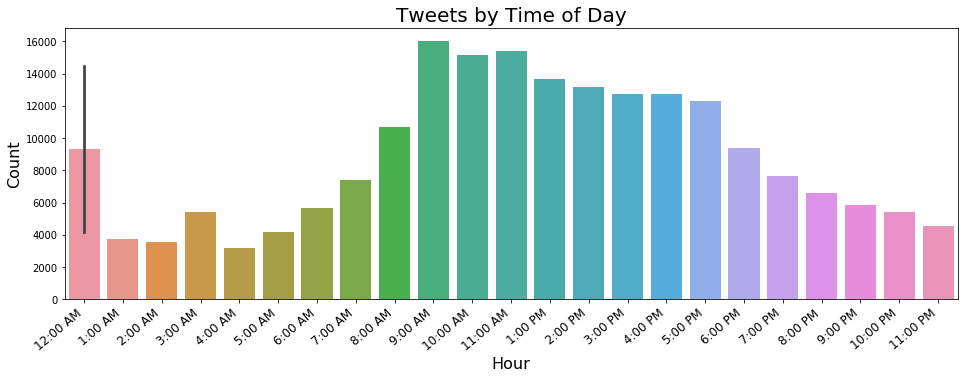

In [182]:
# Plot histogram of Tweet Counts by Hour

plt.figure(figsize=(16,5))
ax = sns.barplot(data=hour_df, x= "Hour", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Hour', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Tweets by Time of Day", fontsize=20)
plt.show()

### What day of the week has the most Tesla tweets?

In [145]:
# Create a dataframe grouping the number of tweets by hour of the day

weekday_df = pd.DataFrame(tweets.groupby(tweets['date_time'].dt.weekday)['clean_tweet'].count()).reset_index()
weekday_df = weekday_df.rename(columns={'date_time': 'Day', 'clean_tweet': 'Count'})
weekday_df.Day = weekday_df.Day.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_df

,Day,Count
0,Monday,32853
1,Tuesday,35463
2,Wednesday,37797
3,Thursday,36607
4,Friday,33320
5,Saturday,19295
6,Sunday,17818


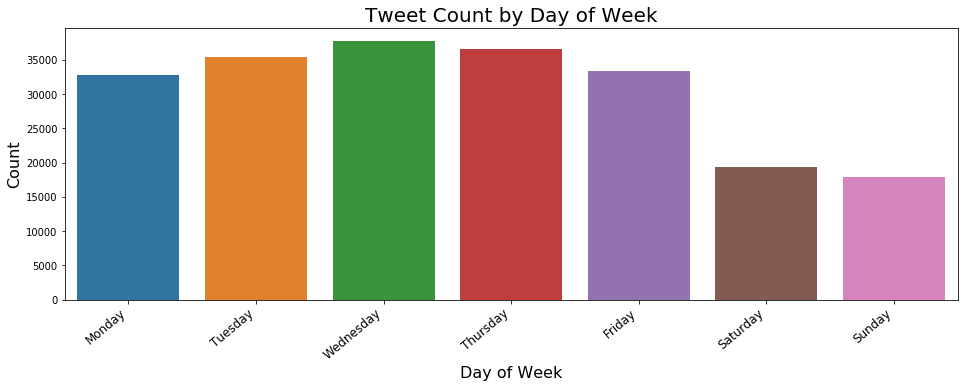

In [183]:
# Plot histogram of Tweet Counts by Hour

plt.figure(figsize=(16,5))
ax = sns.barplot(data=weekday_df, x= "Day", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Tweet Count by Day of Week", fontsize=20)
plt.show()

### What day of the year had the most tweets about Tesla?

In [147]:
# Create a dataframe grouping the number of tweets by hour of the day
day_df = pd.DataFrame(tweets.resample('D', on='date_time')['clean_tweet'].count()).reset_index().sort_values(by='clean_tweet', ascending=False)
day_df = day_df.rename(columns={'date_time': 'Day', 'clean_tweet': 'Count'})
day_df.head()

,Day,Count
218,2018-08-07,1713
219,2018-08-08,1568
249,2018-09-07,1390
458,2019-04-04,1283
212,2018-08-01,1260


In [150]:
top_tweeted_days = day_df.sort_values(by = 'Count', ascending=False)[:25]
top_tweeted_days 

,Day,Count
218,2018-08-07,1713
219,2018-08-08,1568
249,2018-09-07,1390
458,2019-04-04,1283
212,2018-08-01,1260
296,2018-10-24,1259
476,2019-04-22,1240
270,2018-09-28,1229
478,2019-04-24,1171
228,2018-08-17,1146


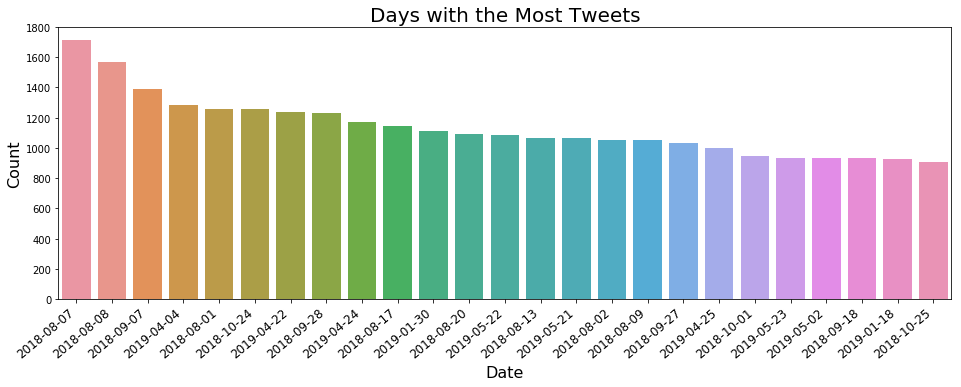

In [187]:
# Plot histogram of Tweet Counts by Hour

plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_tweeted_days, x= top_tweeted_days.Day.dt.date, y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Days with the Most Tweets", fontsize=20)
plt.show()

## Save the Cleaned Tweets

In [152]:
filepath = r'/Users/erikadauria/Flatiron/Projects/Tesla_Twitter_Sentiment_Analysis/cleaned_tweets.csv'

tweets.to_csv(filepath, header=True)

test = pd.read_csv('cleaned_tweets.csv')
test.head()

,Unnamed: 0,id,tweet,date_time,clean_tweet
0,0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:33:19,rating increase hold valuengine
1,1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEn...,2018-01-01 00:35:15,rating increase hold valuengine
2,2,947709627394748416,Horseman Capital Management LTD Increases Posi...,2018-01-01 01:02:37,horseman capital management ltd increase posit...
3,3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Ca...,2018-01-01 01:15:37,inc hold lifted horseman capital management ltd
4,4,947732179253170177,Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Se...,2018-01-01 02:32:14,insider sell inc nasda vp sell share stock
